In [1]:
import datajoint as dj
#from dj_ratacad import flashcount
#data=(flashcount.FlashCountTrial() & 'name = "Sriracha"' & 'outcome != "Omission"').fetch(format="frame")
from scipy import signal
import mne
from dj_ratacad import flashes
data=(flashes.FlashesTrial() & 'name = "1062"' & 'outcome != "Omission"').fetch(format="frame")
#data = data.reset_index(level=['trial_datetime', 'stage'])

import pandas as pd

#data = data.reset_index(level=['trial_datetime', 'stage'])

#from dj_ratacad import flashes
#data=(flashes.FlashesTrial() & 'name = "1062"' & 'outcome != "Omission"').fetch(format="frame")
#data = data.reset_index(level=['trial_datetime', 'stage'])

data = data.reset_index(level=['trial_datetime', 'stage'])

data['Date'] = pd.to_datetime(data['trial_datetime']).dt.date
data['Hour'] = pd.to_datetime(data['trial_datetime']).dt.hour
def get_sec(time_str):
    """Get seconds from time."""
    h, m, s = str(time_str).split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

data['Date'] = pd.to_datetime(data['trial_datetime'],utc=True).dt.date
data['Hour'] = pd.to_datetime(data['trial_datetime'],utc=True).dt.hour

data['Time'] = pd.to_datetime(data['trial_datetime'],utc=True).dt.time
data['Datetime'] = pd.to_datetime(data['trial_datetime'],utc=True)
data['S'] = data['Time'].apply(get_sec)


[2023-08-01 12:50:04,543][INFO]: DataJoint verified plugin `datajoint_connection_hub` detected.
[2023-08-01 12:50:06,325][INFO]: Connecting scott_lab_mgr@buaws-aws-cf-rds-mysql-prod.cenrervr4svx.us-east-2.rds.amazonaws.com:3306
[2023-08-01 12:50:06,598][INFO]: Connected scott_lab_mgr@buaws-aws-cf-rds-mysql-prod.cenrervr4svx.us-east-2.rds.amazonaws.com:3306


In [2]:
dt1 = data.loc[(data['trial_datetime'] >= pd.Timestamp(2023,1,11,0,0)) & (data['trial_datetime'] <= pd.Timestamp(2023,1,11,18,0))]
dt2 = data.loc[(data['trial_datetime'] >= pd.Timestamp(2022,12,8,0,0)) & (data['trial_datetime'] <= pd.Timestamp(2022,12,8,18,0))]
#dt3 = data.loc[(data['trial_datetime'] >= pd.Timestamp(2022,12,1,0,0)) & (data['trial_datetime'] <= pd.Timestamp(2022,12,1,18,0))]

frames = [dt1, dt2] #, dt3]
dt = pd.concat(frames)

In [3]:
dt

trial_datetime  stage choice  \
name session_datetime    trial task                                     
1062 2023-01-11 12:29:34 1     rate 2023-01-11 12:29:34      0   left   
                         2     rate 2023-01-11 12:31:41      0  right   
                         3     rate 2023-01-11 12:32:16      0  right   
                         4     rate 2023-01-11 12:32:22      0  right   
                         5     rate 2023-01-11 12:32:38      0  right   
...                                                 ...    ...    ...   
     2022-12-08 12:50:18 233   rate 2022-12-08 14:20:38      0   left   
                         234   rate 2022-12-08 14:20:46      0   left   
                         235   rate 2022-12-08 14:20:55      0   left   
                         236   rate 2022-12-08 14:21:41      0   left   
                         237   rate 2022-12-08 14:22:16      0   left   

                                     outcome      rt  init_time correct_side  \
name session_datetime    trial task                                            
1062 2023-01-11 12:29:34 1     rate    error  0.8769   118.3300        right   
                         2     rate  correct  1.5148    28.1311        right   
                         3     rate  correct  1.1866     0.3237        right   
                         4     rate    error  0.8653     6.6816         left   
                         5     rate    error  1.2492     0.1548         left   
...                                      ...     ...        ...          ...   
     2022-12-08 12:50:18 233   rate  correct  0.5681     1.3864         left   
                         234   rate  correct  0.5271     3.1186         left   
                         235   rate  correct  1.4437    39.1617         left   
                         236   rate  correct  1.7494    27.5121         left   
                         237   rate    error  0.6064     6.7232        right   

                                     lambda_left  lambda_right  flash_bins  \
name session_datetime    trial task                                          
1062 2023-01-11 12:29:34 1     rate      -100.00          0.75           8   
                         2     rate      -100.00          0.75          15   
                         3     rate      -100.00          0.75          11   
                         4     rate         0.75       -100.00           8   
                         5     rate         0.75       -100.00          12   
...                                          ...           ...         ...   
     2022-12-08 12:50:18 233   rate         0.75       -100.00           5   
                         234   rate         0.75       -100.00           5   
                         235   rate         0.75       -100.00          14   
                         236   rate         0.75       -100.00          17   
                         237   rate      -100.00          0.75           6   

                                          flashes_left      flashes_right  \
name session_datetime    trial task                                         
1062 2023-01-11 12:29:34 1     rate           00111010           11000101   
                         2     rate    000000000011000    111111111100111   
                         3     rate        00000000001        11111111110   
                         4     rate           01110110           10001001   
                         5     rate       011001100110       100110011001   
...                                                ...                ...   
     2022-12-08 12:50:18 233   rate              11111              00000   
                         234   rate              11111              00000   
                         235   rate     11101101011001     00010010100110   
                         236   rate  01111111111011111  10000000000100000   
                         237   rate             101001             010110   

                                 

In [21]:
#dt = data.loc[(data['trial_datetime'] >= pd.Timestamp(2022,11,1,23,59,4))]
#dt = dt.iloc[:192]
#print(dt)
#dt['trial_datetime'].iloc[-1]

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import fnmatch
import os
import pickle

os.chdir('/home/qdo/EEG/Data/noninjected1_11/')
data = []
timestamps = []
for subdir,dirs,files in sorted(os.walk('.')):
    #print(dirs)
    for file in sorted(files):
        if fnmatch.fnmatch(file, '202*') and not fnmatch.fnmatch(file, '*_split'):
            print(file)
            fullpath = os.path.join(subdir,file)
            with open(fullpath,'rb') as f:
                data.append(pickle.load(f))
                #timestamps.append(str(file))
os.chdir('/home/qdo/EEG/Data/noninjected12_8/')
for subdir,dirs,files in sorted(os.walk('.')):
    #print(dirs)
    for file in sorted(files):
        if fnmatch.fnmatch(file, '202*') and not fnmatch.fnmatch(file, '*_split'):
            print(file)
            fullpath = os.path.join(subdir,file)
            with open(fullpath,'rb') as f:
                data.append(pickle.load(f))
                timestamps.append(str(file))
#os.chdir('/Users/qdo/noninjected12_1/')
#for subdir,dirs,files in sorted(os.walk('.')):
    #print(dirs)
#    for file in sorted(files):
#        if fnmatch.fnmatch(file, '202*') and not fnmatch.fnmatch(file, '*_split'):
#            print(file)
#            fullpath = os.path.join(subdir,file)
#            with open(fullpath,'rb') as f:
#                data.append(pickle.load(f))
#                timestamps.append(str(file))

2023-01-11 12:59:04.096037
2023-01-11 13:59:04.096035
2023-01-11 14:59:04.096034
2023-01-11 15:59:04.096022
2022-12-08 12:59:03.374027
2022-12-08 13:59:03.374034
2022-12-08 14:59:03.374034
2022-12-08 15:59:03.374081


In [6]:
dt

trial_datetime  stage choice  \
name session_datetime    trial task                                     
1062 2023-01-11 12:29:34 1     rate 2023-01-11 12:29:34      0   left   
                         2     rate 2023-01-11 12:31:41      0  right   
                         3     rate 2023-01-11 12:32:16      0  right   
                         4     rate 2023-01-11 12:32:22      0  right   
                         5     rate 2023-01-11 12:32:38      0  right   
...                                                 ...    ...    ...   
     2022-12-08 12:50:18 233   rate 2022-12-08 14:20:38      0   left   
                         234   rate 2022-12-08 14:20:46      0   left   
                         235   rate 2022-12-08 14:20:55      0   left   
                         236   rate 2022-12-08 14:21:41      0   left   
                         237   rate 2022-12-08 14:22:16      0   left   

                                     outcome      rt  init_time correct_side  \
name session_datetime    trial task                                            
1062 2023-01-11 12:29:34 1     rate    error  0.8769   118.3300        right   
                         2     rate  correct  1.5148    28.1311        right   
                         3     rate  correct  1.1866     0.3237        right   
                         4     rate    error  0.8653     6.6816         left   
                         5     rate    error  1.2492     0.1548         left   
...                                      ...     ...        ...          ...   
     2022-12-08 12:50:18 233   rate  correct  0.5681     1.3864         left   
                         234   rate  correct  0.5271     3.1186         left   
                         235   rate  correct  1.4437    39.1617         left   
                         236   rate  correct  1.7494    27.5121         left   
                         237   rate    error  0.6064     6.7232        right   

                                     lambda_left  lambda_right  flash_bins  \
name session_datetime    trial task                                          
1062 2023-01-11 12:29:34 1     rate      -100.00          0.75           8   
                         2     rate      -100.00          0.75          15   
                         3     rate      -100.00          0.75          11   
                         4     rate         0.75       -100.00           8   
                         5     rate         0.75       -100.00          12   
...                                          ...           ...         ...   
     2022-12-08 12:50:18 233   rate         0.75       -100.00           5   
                         234   rate         0.75       -100.00           5   
                         235   rate         0.75       -100.00          14   
                         236   rate         0.75       -100.00          17   
                         237   rate      -100.00          0.75           6   

                                          flashes_left      flashes_right  \
name session_datetime    trial task                                         
1062 2023-01-11 12:29:34 1     rate           00111010           11000101   
                         2     rate    000000000011000    111111111100111   
                         3     rate        00000000001        11111111110   
                         4     rate           01110110           10001001   
                         5     rate       011001100110       100110011001   
...                                                ...                ...   
     2022-12-08 12:50:18 233   rate              11111              00000   
                         234   rate              11111              00000   
                         235   rate     11101101011001     00010010100110   
                         236   rate  01111111111011111  10000000000100000   
                         237   rate             101001             010110   

                                 

In [7]:
from scipy import signal
import mne
def processData(data):
    eeg = ((data[2,:]-2)*1000).reshape(-1) 
    eeg=signal.detrend(eeg)
    sf = 1000.
    times = np.arange(eeg.size)/sf
    # Plot the signal
    emg = ((data[3,:]-2)*1000).reshape(-1) 
    sf = 1000.
    lab1 = ((data[6,:])).reshape(-1) 
    sf = 1000.
    lab2 = ((data[7,:])).reshape(-1) 
    label = np.zeros_like(lab1)
    first_flash = 0
    flashcount = 0
    for i in range(0,len(lab1)):
        if (lab1[i] == 0) and (lab2[i] == 0):
            label[i] = 1
        elif (lab1[i] == 0) and (lab2[i] > 0):
            label[i] = 2
        elif (lab1[i] > 0) and (lab2[i] == 0):
            label[i] = 3
            first_flash = 1
        else:
            if (first_flash == 1) and (flashcount ==0): 
                label[i] = 4
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    first_flash = 0
                    flashcount = flashcount + 1
            elif (first_flash == 0) and (flashcount ==1): 
                label[i] = 5
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    first_flash = 0
                    flashcount = 0
            else:
                pass
            #else:
            #    label[i] = 14   
            #    flashcount = 0
    n_channels = 2
    sampling_freq = 1000  # in Hertz
    info = mne.create_info(n_channels, sfreq=sampling_freq)
    #print(info)
    ch_names = ['EEG001','STIM1','STIM2','STIM3'] 
    ch_types = ['eeg','stim','stim','stim']
    info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
    #print(info)
    info['description'] = 'My custom dataset'
    #print(info)
    rawdata= np.array([eeg/1000000,label,lab1,lab2])
    simulated_raw = mne.io.RawArray(rawdata, info)
    raw_downsampled = simulated_raw.copy().resample(sfreq=500)
    return raw_downsampled

In [8]:
data0 = np.concatenate(data, axis=1)
del data
d0 = processData(data0)
del data0

Creating RawArray with float64 data, n_channels=4, n_times=28792008
    Range : 0 ... 28792007 =      0.000 ... 28792.007 secs
Ready.
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
9229 events found
Event IDs: [1 2 3 4 5]
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
9228 events found
Event IDs: [1 2 3 4 5]


In [9]:
events0 = mne.find_events(d0, stim_channel=['STIM1'],shortest_event=1,min_duration=0.01,initial_event=True,consecutive=True)
event_dict = {'choice':2,
             'stim2':5,
             'center':3}

epochs0 = mne.Epochs(d0, events0,event_id=event_dict, tmin=-0.1, tmax=0.50, preload=True,event_repeated='drop',detrend=0)
f0_evoked_d0 = epochs0['stim2'] #.average()

7660 events found
Event IDs: [1 2 3 4 5]
Not setting metadata
1701 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1701 events and 301 original time points ...
0 bad epochs dropped


(560, 3)
(560,)
Not setting metadata
560 matching events found
Setting baseline interval to [-2.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 560 events and 1501 original time points ...
0 bad epochs dropped


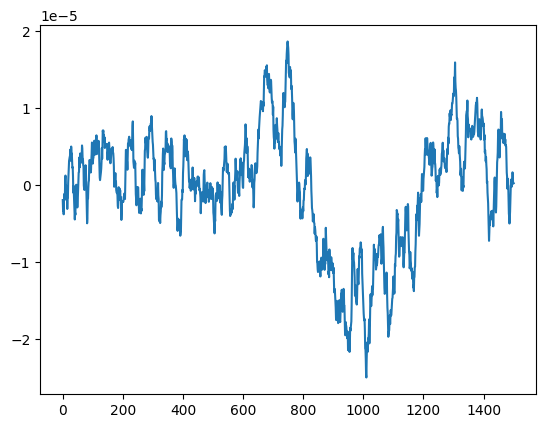

In [12]:
ChoiceEvent=events0[events0[:,2]==2] 
event_dict2 = {'e':0,'g':1}
print(ChoiceEvent.shape)
outcomeLabel = np.array(dt.loc[:,"outcome"])

for i in range(len(outcomeLabel)):
    if (outcomeLabel[i] == "error"):
        outcomeLabel[i] = 0 #left wrong
    else: 
        outcomeLabel[i] = 1 #Left correct
        
#outcomeLabel = np.array(dt.loc[:,"reward"])
print(outcomeLabel.shape)
ChoiceEvent[:len(outcomeLabel),2] = outcomeLabel
choice_epochs = mne.Epochs(d0, ChoiceEvent,event_id=event_dict2, tmin=-2, tmax=1, preload=True)

epochs_train = choice_epochs.copy()
labels = choice_epochs.events[:, -1] 
epochs_data_train = epochs_train.get_data()
idx1 = np.where(labels==1)
idx2 = np.where(labels==0)
plt.figure()
plt.plot(np.mean(epochs_data_train[idx1[0],0,:],axis=0))

(570, 3)
(560,)
Not setting metadata
560 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 560 events and 2001 original time points ...
0 bad epochs dropped
101110
010001
[1 0 1 1 1 0]
[0 1 0 0 0 1]


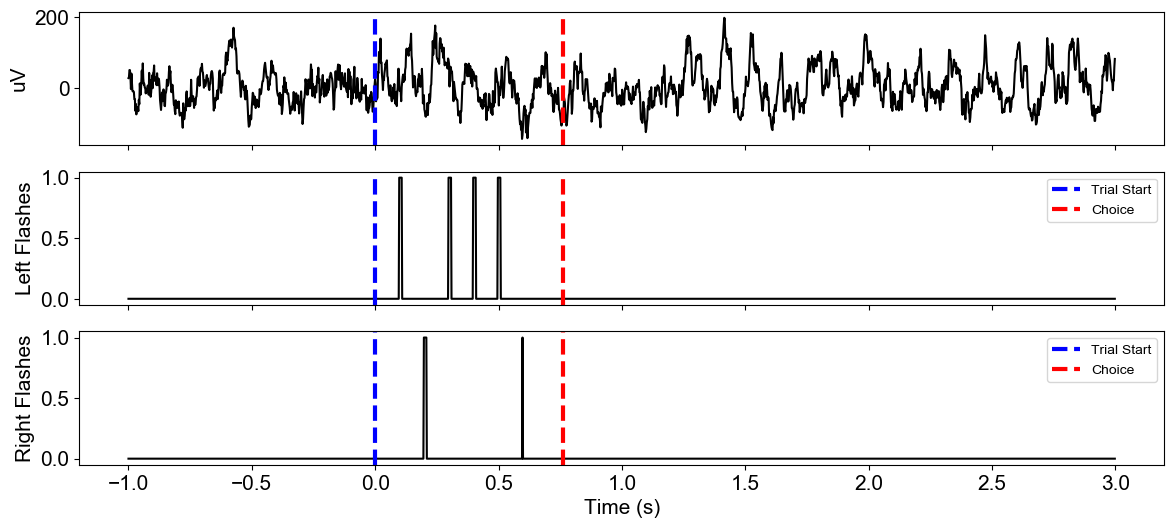

In [29]:
ChoiceEvent=events0[events0[:,2]==3] 
event_dict2 = {'e':0,'g':1}
print(ChoiceEvent.shape)
outcomeLabel = np.array(dt.loc[:,"outcome"])
for i in range(len(outcomeLabel)):
    if (outcomeLabel[i] == "error"):
        outcomeLabel[i] = 0 #left wrong
    else: 
        outcomeLabel[i] = 1 #Left correct
        
#outcomeLabel = np.array(dt.loc[:,"reward"])
print(outcomeLabel.shape)
ChoiceEvent[:len(outcomeLabel),2] = outcomeLabel
choice_epochs = mne.Epochs(d0, ChoiceEvent,event_id=event_dict2, tmin=-1, tmax=3, preload=True)

epochs_train = choice_epochs.copy()
labels = choice_epochs.events[:, -1] 
epochs_data_train = epochs_train.get_data()
idx1 = np.where(labels==1)
idx2 = np.where(labels==0)
LFLabel = np.array(dt.loc[:,"flashes_left"])
RFLabel = np.array(dt.loc[:,"flashes_right"])


import seaborn as sns
#sns.set()
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

font = {'family' : 'arial',
        'weight' : 'normal'}
plt.rc('font', **font)
params = {'legend.fontsize': 'large',
          'figure.figsize': (12,6),
          'axes.labelsize': 20,
          'axes.titlesize': 20,
          'xtick.labelsize': 20*0.75,
          'ytick.labelsize': 20*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
#plt.figure(figsize =(10,8))
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(14, 6),sharex=True)

time = np.arange(-1,3,4/epochs_data_train.shape[2])
#time = np.arange(-0.5,3,3.5/701)
#10
trial_num = 56
LFLabel = LFLabel[idx1[0][trial_num]]
RFLabel = RFLabel[idx1[0][trial_num]]
print(LFLabel)
print(RFLabel)
LFLabel = np.array(list(LFLabel),dtype=int)
RFLabel = np.array(list(RFLabel),dtype=int)
print(LFLabel)
print(RFLabel)
FLASHSTIM = epochs_data_train[idx1[0][trial_num],2,:] + epochs_data_train[idx1[0][trial_num],3,:]
LSTIM = np.zeros_like(FLASHSTIM)
RSTIM = np.zeros_like(FLASHSTIM)
TRIALSTARTEND = np.zeros_like(FLASHSTIM)
flashcount = 0
firstencounter =0
for i in range(0,len(FLASHSTIM)):
    if FLASHSTIM[i] > 5:
        if (flashcount >= len(RFLabel)):
            pass
        else:
            if firstencounter == 1:
                firstencounter = 0
                flashcount = flashcount+1
            if LFLabel[flashcount-1] == 1:
                LSTIM[i] = 1
            else:
                LSTIM[i] = 0
            if RFLabel[flashcount-1] == 1:
                RSTIM[i] = 1
            else:
                RSTIM[i] = 0
    else:
        firstencounter = 1

choiceind = 0
for i in range(0,len(FLASHSTIM)):
    if FLASHSTIM[i] >= 5:
        TRIALSTARTEND[i] == 0
    elif (FLASHSTIM[i] < 5) and (FLASHSTIM[i] > 0):
        TRIALSTARTEND[i] = 1
    else:
        TRIALSTARTEND[i] = 0
    if FLASHSTIM[i] == 4:
        choiceind = i
        break

ax1.plot(time,1000000*(epochs_data_train[idx1[0][trial_num],0,:]),color="black",linestyle='-')
ax2.plot(time,LSTIM,linestyle='-',color="black")
ax3.plot(time,RSTIM,linestyle='-',color="black")
#ax4.plot(time,TRIALSTARTEND,linestyle='-',color="black")

ax1.axvline(0, linestyle='--', color='blue',label="Trial Start",linewidth=3)
ax1.axvline(time[i], linestyle='--', color='red',label="Choice",linewidth=3)
ax2.axvline(0, linestyle='--', color='blue',label="Trial Start",linewidth=3)
ax2.axvline(time[i], linestyle='--', color='red',label="Choice",linewidth=3)
ax3.axvline(0, linestyle='--', color='blue',label="Trial Start",linewidth=3)
ax3.axvline(time[i], linestyle='--', color='red',label="Choice",linewidth=3)

#ax1.legend(fontsize=9)
ax2.legend(fontsize=10)
ax3.legend(fontsize=10)

ax1.set_ylabel("uV",fontsize=15)
ax2.set_ylabel("Left Flashes",fontsize=15)
ax3.set_ylabel("Right Flashes",fontsize=15)
#ax4.set_ylabel("Trial Interval",fontsize=15)

plt.xlabel("Time (s)",fontsize=15)
plt.show()

In [26]:
L = np.array(list(LFLabel),dtype=int)
print(L)

[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]


7660 events found
Event IDs: [1 2 3 4 5]
Not setting metadata
1701 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1701 events and 301 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
Not setting metadata
570 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_212182/264306917.py:16: RuntimeWarning: Only one channel in group "eeg"; cannot combine by method "mean".
  eeg_epochs.plot_image(picks="eeg",cmap="jet",fig=fig1,combine='mean',group_by=None, vmin=-50,vmax=50,evoked=True,sigma=2)


combining channels using "mean"


/tmp/ipykernel_212182/264306917.py:16: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  eeg_epochs.plot_image(picks="eeg",cmap="jet",fig=fig1,combine='mean',group_by=None, vmin=-50,vmax=50,evoked=True,sigma=2)


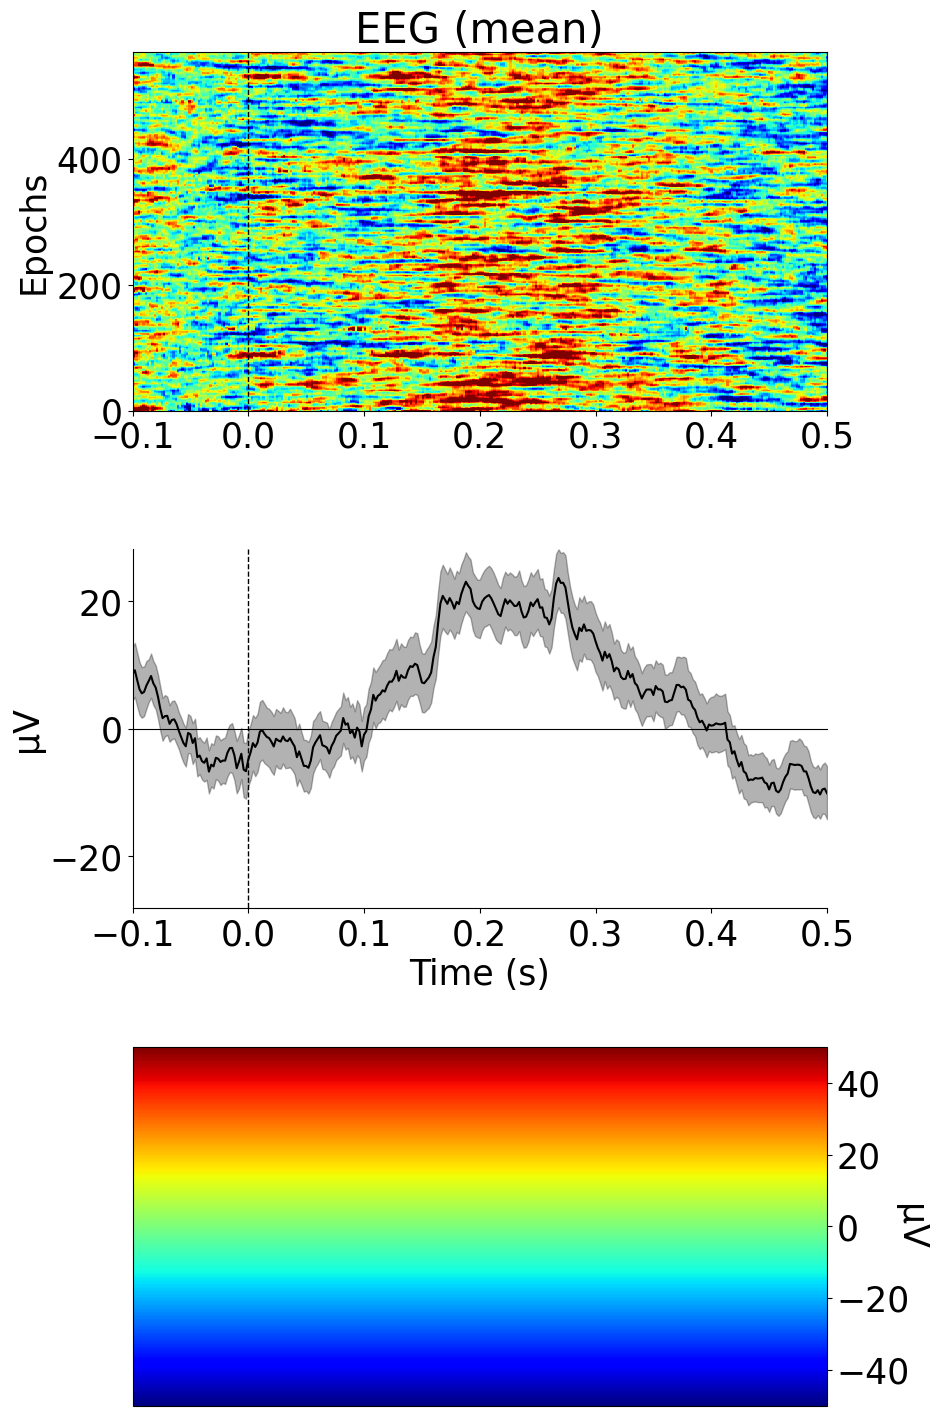

In [14]:
events0 = mne.find_events(d0, stim_channel=['STIM1'],shortest_event=1,min_duration=0.01,initial_event=True,consecutive=True)
event_dict = {'choice':2,
             'stim1':5,
             'center':3}

epochs0 = mne.Epochs(d0, events0,event_id=event_dict, tmin=-0.1, tmax=0.50, preload=True,event_repeated='drop',detrend=1)
f0_evoked_d0 = epochs0['center'] #.average()
eeg_epochs = f0_evoked_d0.apply_baseline((-0.1, -0.01))
#eeg_epochs = f0_evoked_d0.apply_baseline((-0.1, 0.1))
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams.update({'font.size': 25})
fig1, (ax1, ax2,ax3) = plt.subplots(3, 1)
fig1.set_figheight(15)
fig1.set_figwidth(10)
eeg_epochs.plot_image(picks="eeg",cmap="jet",fig=fig1,combine='mean',group_by=None, vmin=-50,vmax=50,evoked=True,sigma=2)
plt.show()

In [42]:
import matplotlib.pyplot as plt

import mne
from sklearn.preprocessing import StandardScaler
import numpy as np
def nextexp(value, base=2):
    """
    Given a value and an optional base, this function returns the exponent for
    the smallest powers of the specified base that satisfy:
    base**exponent >= |value|.

    Parameters
    ----------
    value : numeric
        The value that will be compared to the succesive powers of the base
        until the previous condition is met.
    base : numeric, optional
        The base of the power. Default value is 2.

    Returns
    -------
    int
        Exponent that meets the previous condition.

    """
    exponent = 0
    while base ** exponent < np.abs(value):
        exponent += 1
    return exponent

def mne_stockell_power(data, samplingrate, window_length = [-3,0.5], freq_range = [0,100]):
    """
        Computes a high temporal and frequency resolution spectrogram and intertrial coherence
        using the mne.time_frequency.tfr_array_stockwell function (https://mne.tools/stable/generated/mne.time_frequency.tfr_array_stockwell.html).
        It is set up to have a time resolution of 10ms and a frequency resolution depends on the window length.

        Parameters
        ----------
        data : ndarray
            The shape has to be (n_epochs, n_channels, n_times).
            For instance the shape for 2 events, 3 channels and 3000 points
            (3 seconds sampled at 1000) would be (1, 3, 3000)
        samplingrate : numeric
            Sampling frequency in Hz
        window_lenght: list, two numbers
            The seconds before the start of the trial, first number, and after
            the start of the trial, second number, that you want to plot.
        freq_rage: list, two numbers
        The frequency range that you want to calculate.


        Returns
        -------
        st_power: ndarray
            The multitaper power of the Stockwell transformed data.
            The last two dimensions are frequency and time. Shape (n_channels, n_freqs, n_time).
            It should have the same lenght of freqs, dimension 2, and time, dimension 3.
        itc: ndarray
        The intertrial coherence. Only returned if return_itc is True.
        Inter-trial coherence (ITC) is a measure that is computed from single trial EEG,
        which reflects the temporal and spectral synchronization within EEG,
        elucidating the extent to which underlying phase-locking occurs
        freqs: ndarray
        The points of frequencies that correspond to the frequencies calculated.
        Y axis spectrogram
        time: ndarray
        The points of time that correspond to the windowlenght,
        X axis spectrogram
        """


    st_power, itc, freqs = mne.time_frequency.tfr_array_stockwell(
        data, samplingrate, fmin=freq_range[0], fmax=freq_range[1],
        n_fft= np.power(2, nextexp(data.shape[-1], base=2)), width=1,
        decim=int(samplingrate / 100), return_itc=True)
    time = np.linspace(window_length[0], window_length[1], st_power.shape[-1])

    return st_power, itc, freqs, time

def plot_spectrograms(st_power, itc, freqs, time, freq_range = [0,100], cmap = 'jet', title = '' , channel = 0):
    """
    Simple function to plot

    st_power: ndarray
        The spectogram o itc data from the  mne_stockell_power funtion
    freqs: ndarray
        The points of frequencies that correspond to the frequencies calculated.
        Y axis spectrogram
    time: ndarray
        The points of time that correspond to the windowlenght,
        X axis spectrogram
    freq_rage: list, two numbers
        The frequency range that you want to calculate.
    cmap: string
        Colormap of the plot
    title: string
        Title of the plot
    channel: integer
        channel that you want to plot. Default 0, so it can also plot the mean of all channels (1 dimension).
    return:
    Plot
    """
#vmin=freq_range[0], vmax=freq_range[1]
    import matplotlib
    fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [1] + [0.2],
                    'wspace': 0.2, 'hspace': 0.1})
    fig.suptitle(title, x=0.5, y=0.95)
    scaler = StandardScaler()
    data=((st_power[channel,:,:]))*np.power(10,12) #uv^2/hz
    scaler.fit(data)
    toshow = scaler.transform(data)
    im = ax[0].imshow(
        (data), cmap=cmap, aspect='auto',
        interpolation='hanning',
        origin='lower', extent=(time[0],
                                time[-1], freqs[0],
                                freqs[-1]))
    fig.colorbar(im, cax=ax[1], orientation='vertical')
    plt.show()
    return None


6802 events found
Event IDs: [1 2 3 4]
Not setting metadata
1702 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1702 events and 1551 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


<ipython-input-42-080369ee869d>:75: RuntimeWarning: The input signal is shorter (1551) than "n_fft" (2048). Applying zero padding.
  decim=int(samplingrate / 100), return_itc=True)
<ipython-input-42-080369ee869d>:75: RuntimeWarning: The input signal is shorter (1551) than "n_fft" (2048). Applying zero padding.
  decim=int(samplingrate / 100), return_itc=True)


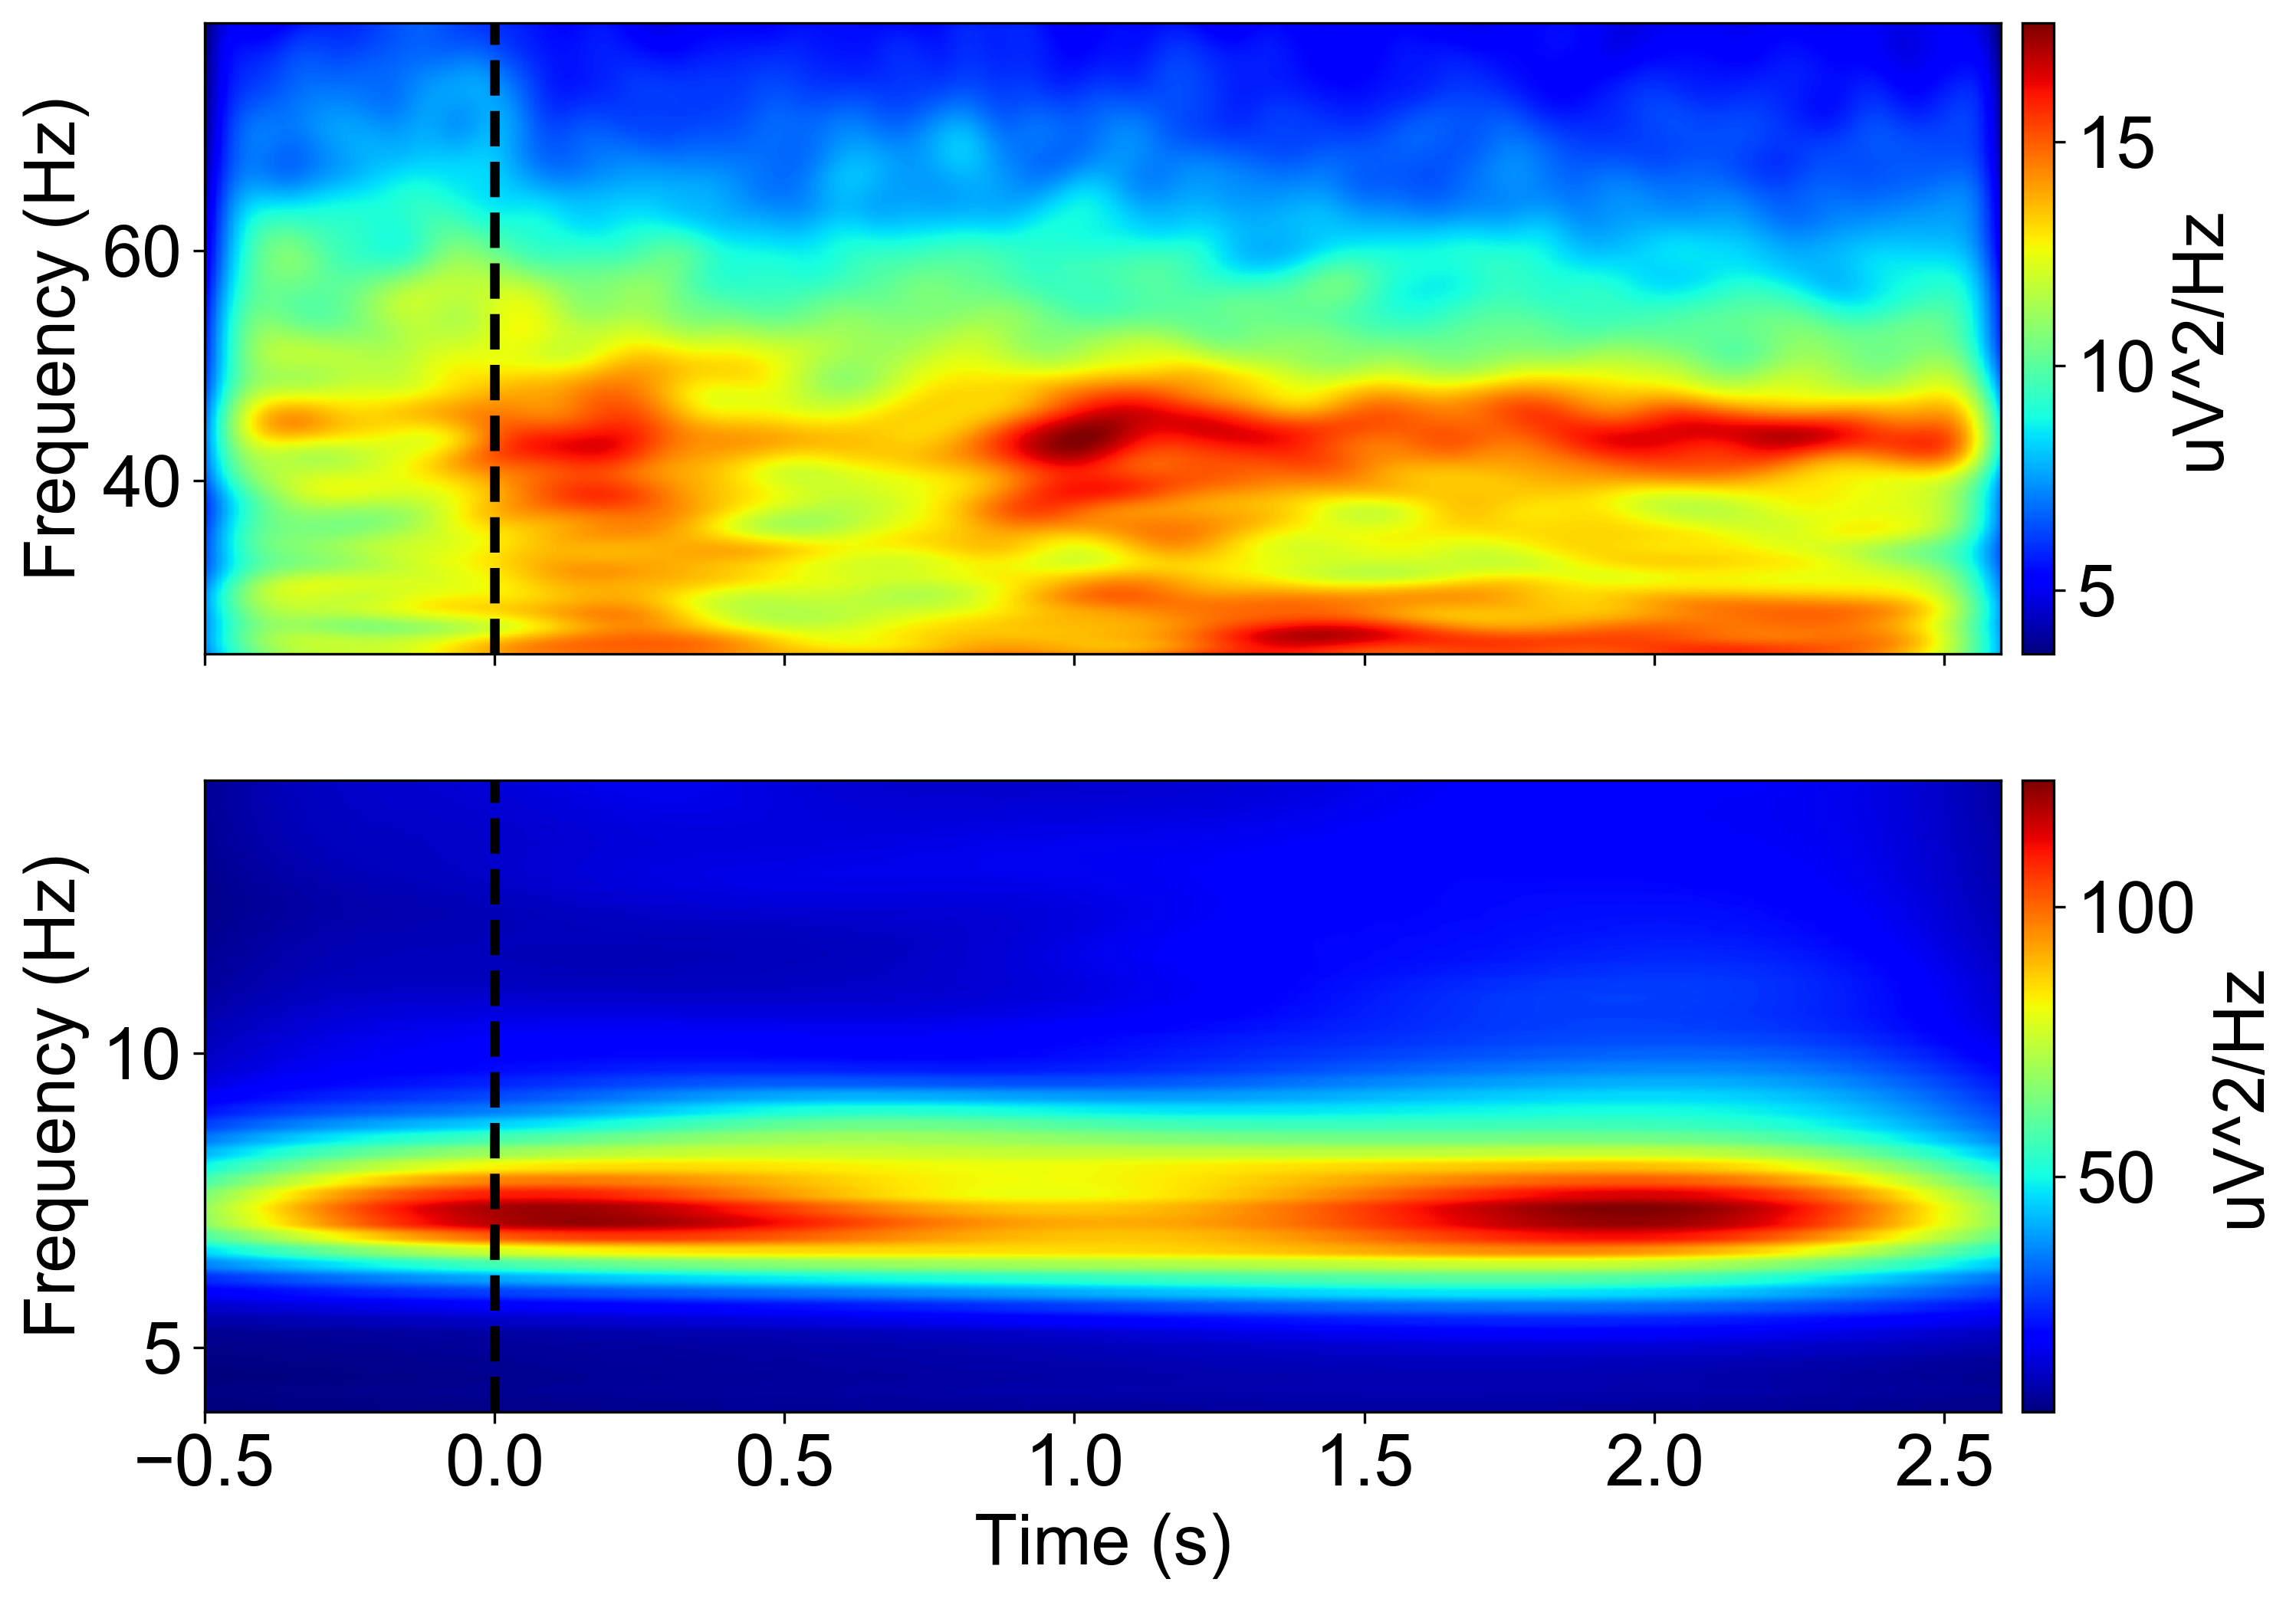

In [77]:
events0 = mne.find_events(d0, stim_channel=['STIM1'],shortest_event=1,min_duration=0.01,initial_event=True,consecutive=True)
event_dict = {'choice':2,
             'stim1':4,
             'center':3}

epochs0 = mne.Epochs(d0, events0,event_id=event_dict, tmin=-0.5, tmax=2.6, preload=True,event_repeated='drop',detrend=0)
f0_evoked_d0 = epochs0['center'] #.average()
eeg_epochs = f0_evoked_d0.apply_baseline((-0.5, 0))

epoch = eeg_epochs.get_data(picks='eeg')
st_power1, itc1, freqs1, time = mne_stockell_power(epoch[:,0:1,:],500,window_length = [-0.5,2.6],freq_range = [4,15])
st_power2, itc2, freqs2, time = mne_stockell_power(epoch[:,0:1,:],500,window_length = [-0.5,2.6],freq_range = [25,80])

font = {'family' : 'arial',
        'weight' : 'normal'}
plt.rc('font', **font)


params = {'legend.fontsize': 'large',
          'figure.figsize': (12,8),
          'axes.labelsize': 22,
          'axes.titlesize': 19,
          'xtick.labelsize': 30*0.75,
          'ytick.labelsize': 30*0.75,
          'axes.titlepad': 25}

plt.rcParams.update(params)

import matplotlib
fig, ax = plt.subplots(2,1,sharex=True)
time = np.arange(-0.5,2.6,3.1/epoch.shape[2])

cmap='jet'
data=((st_power1[0,:,:]))*np.power(10,12) #uv^2/hz

im = ax[1].imshow(
    (data), cmap=cmap, aspect='auto',
        interpolation='hanning',
        origin='lower', extent=(time[0],
                                time[-1], freqs1[0],
                                freqs1[-1]))
ax[1].set_ylabel("Frequency (Hz)")

fig.colorbar(im, orientation='vertical',ax=ax[1],pad=0.01,label="uV^2/Hz")

data2=((st_power2[0,:,:]))*np.power(10,12) #uv^2/hz

im = ax[0].imshow(
    (data2), cmap=cmap, aspect='auto',
        interpolation='hanning',
        origin='lower', extent=(time[0],
                                time[-1], freqs2[0],
                                freqs2[-1]))
ax[0].set_ylabel("Frequency (Hz)")
ax[1].set_xlabel("Time (s)")
fig.colorbar(im, orientation='vertical',ax=ax[0],pad=0.01,label="uV^2/Hz",)

pos = ax[1].get_position()
pos2 = ax[0].get_position()
ax[0].set_position([pos.x0,pos2.y0,pos.width,pos2.height])

ax[0].axvline(0, linestyle='--', color='black',label="Trial Start",linewidth=3)
ax[1].axvline(0, linestyle='--', color='black',label="Trial Start",linewidth=3)


plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.show()


In [ ]:
print(len(idx1[0]))
print(len(idx2[0]))


In [ ]:
z = 1000000*eeg_epochs.get_data(picks='eeg')
z.shape
from scipy import optimize
from scipy.ndimage import gaussian_filter
import seaborn as sns
#def func(x, a, b):
#    y = a*x + b
#    return y
#x = np.arange(0,45)
##y = np.mean(z[:,0,(63-45):],axis=0)
#alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
#print(alpha)
#print(x.shape)
#newy = alpha[0]*x + alpha[1]
#y = signal.detrend(np.mean(z[:,0,:],axis=0))
#for i in range(0,z.shape[0]):
    #z[i,0,(63-45):] = z[i,0,(63-45):]-newy
#    z[i,0,(63-45):] = signal.detrend(z[i,0,(63-45):])
z_filter = np.zeros_like(z)
z_filter[:,0,:] = gaussian_filter(z[:,0,:], sigma=1.5)
ax = sns.heatmap(z_filter[:,0,:],cmap="jet",robust=True)
#ax.set_xticklabels(np.arange(-0.1,0.2,0.3/z.shape[2]))
plt.show()
#ax = sns.heatmap(z[idx2[0],0,63-45:],cmap="jet",robust=True)
#plt.show()
x = 1000*np.arange(-0.05,0.2,0.25/z.shape[2])
for i in range(0,z_filter.shape[0]): 
    if i in list(idx1[0]):
        plt.plot(x,z_filter[i,0,:])
    #else:
        #plt.plot(x[:-1],z[i,0,:],color="red")
plt.axvline(x=-10,color="blue")
plt.show()
plt.plot(x,np.mean(z_filter[:,0,:],axis=0))
ymean = np.mean(z_filter[:,0,:],axis=0)
plt.show()

for i in range(0,z.shape[0]):
    #z[i,0,(63-45):] = z[i,0,(63-45):]-newy
    z[i,0,:] = z[i,0,:] - ymean
z[:,0,:] = gaussian_filter(z[:,0,:], sigma=1)

ax = sns.heatmap(z[idx1[0],0,:],cmap="jet",robust=True)
#ax.set_xticklabels(np.arange(-0.1,0.2,0.3/z.shape[2]))
plt.show()
plt.axvline(x=-10,color="blue")

for i in range(0,z.shape[0]): 
    if i in list(idx1[0]):
        plt.plot(x,z[i,0,:])
plt.show()
plt.axvline(x=-10,color="blue")
y = (np.mean(z[:,0,:],axis=0))
e = (np.std(z[:,0,:],axis=0))
#plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.plot(x,y)

plt.show()


In [ ]:
z = 1000000*eeg_epochs.get_data(picks='eeg')
z_filter = np.zeros_like(z)
z_filter[:,0,:] = gaussian_filter(z[:,0,:], sigma=1.5)
plt.figure(figsize=(20,5))
#z_filter = signal.detrend(z_filter)

x = 1000*np.arange(-0.05,0.2,0.25/z.shape[2])
for i in range(0,z_filter.shape[0]): 
    #if i in list(idx1[0]):
    plt.plot(x,z_filter[i,0,:])
plt.show()

ax = sns.heatmap(z_filter[:,0,:],cmap="jet",robust=False)

plt.show()

a = 0
b = 150
idx = np.where(np.logical_and(x>=a, x<=b))[0]
Amplitude = []
Latency = []
id1 = idx[0]
id2 = idx[-1]
plt.figure(figsize=(5,7))

Latency = []
for i in range(0,z.shape[2]):
    if i in idx2[0]:
        Amplitude.append(np.max(z_filter[i,0,id1:id2]))
        Latency.append(x[id1+np.argmax(z_filter[i,0,id1:id2])])
plt.hist(Amplitude,alpha = 0.7,color = "lightblue", ec="black", lw=1)
plt.ylabel("Trials")
plt.xlabel("P1 Amplitude (uV)")
plt.show()

plt.hist(Latency,alpha = 0.7,color = "lightblue", ec="black", lw=1)
plt.ylabel("Number of Trials")
plt.xlabel("Latency (ms)")
plt.show()

In [ ]:
z = 1000000*eeg_epochs.get_data(picks='eeg')
z_filter = np.zeros_like(z)
z_filter[:,0,:] = gaussian_filter(z[:,0,:], sigma=1)
plt.figure(figsize=(5,7))
z_filter = signal.detrend(z_filter)
plt.plot(x,np.mean(z_filter[:,0,:],axis=0))
plt.show()

In [ ]:
plt.rcParams['figure.dpi'] = 70
plt.rcParams['savefig.dpi'] = 70
plt.rcParams.update({'font.size': 28})


In [ ]:
z.shape

In [ ]:
from scipy import signal
eeg_epochs = f0_evoked_d0.apply_baseline((-0.1, -0.01))

z = 1000000*f0_evoked_d0.get_data(picks='eeg')
z[:,0,:] = gaussian_filter(z[:,0,:], sigma=0)
#z = z[:,:,(53-45):]
print(z.shape)
x = 1000*np.arange(-0.1,0.21,0.31/z.shape[2])
x = x[:-1]
#for i in range(0,z.shape[0]):
#    z[i,:,:] = signal.detrend(z[i,:,:])
#y = (np.mean(z[:,0,:],axis=0))
#e = (np.std(z[:,0,:],axis=0))

#y = signal.detrend(np.mean(z[idx1[0],0,:],axis=0))
#e = signal.detrend(np.std(z[idx1[0],0,:],axis=0))
y = np.mean(z[idx1[0],0,:],axis=0)
e = np.std(z[idx1[0],0,:],axis=0)

plt.figure(figsize=(5,7))
plt.fill_between(x, y-e, y+e,alpha=0.1, edgecolor='#1B2ACC', facecolor='#089FFF')

#plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.plot(x, y,linewidth=1)
plt.axvline(x=-10,color="red")
plt.axvline(x=0,color="red")

#plt.plot(1000*np.arange(-0.01,0.3,0.31/z.shape[2]),x)
plt.xlabel("Time (ms)")
plt.ylabel("uV")
#plt.xlim([-30,200])
#plt.xlim([-10,150])

plt.show()


y = signal.detrend(np.mean(z[idx1[0],0,:],axis=0))
e = signal.detrend(np.std(z[idx1[0],0,:],axis=0))

#y = (np.mean(z[idx2[0],0,:],axis=0))
#e = (np.std(z[idx2[0],0,:],axis=0))
plt.figure(figsize=(5,5))
#plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.fill_between(x, y-e, y+e,alpha=0.1, edgecolor='#1B2ACC', facecolor='#089FFF')

plt.plot(x, y,linewidth=1)
plt.axvline(x=-10,color="red")
plt.axvline(x=0,color="red")

#plt.plot(1000*np.arange(-0.01,0.3,0.31/z.shape[2]),x)
plt.xlabel("Time (ms)")
plt.ylabel("uV")
#plt.xlim([-30,200])
#plt.xlim([-10,150])

plt.show()


In [ ]:
z.shape